![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)

---
<br>
© 2024 Copyright The University of New South Wales - CRICOS 00098G

**Author**: Oscar Perez-Concha: o.perezconcha@unsw.edu.au

**Contributors/Co-authors**: Marta Fredes-Torres, Zhisheng (Sandy) Sa and Matthew Sainsbury-Dale.








---



# Laboratory 4: Single decision trees.



Step 1: Goal/Research question: To build a predictive algorithm to predict (classify) whether a tumour is malignant based on the measurements of the tissue extracted from the breast.

Step 2: Do we have a dataset to answer that question or to at least try to answer that question?
The Wisconsin Breast Cancer dataset contains records of clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors). As stated above, our task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

![alt text](https://drive.google.com/uc?export=view&id=105SGqeyo8RgLhSO8mN7ZE5OsG0YiLPKt)

# 1. Introduction

In this exercise, we will introduce single decision trees.

This exercise aligns with all of the learning outcomes of our course:

1.	Distinguish a range of task specific machine learning techniques appropriate for Health Data Science.
2.	Design machine learning tasks for Health Data Science scenarios.



---





---



# 2. Initial Docstring:


All programs should have an initial docstring comment. It must include at least the following elements:

* Purpose: what is the aim of your code?
* Date created
* Author
* Date modified
* Author of the modification
* Method: how did you go about solving the problem?
* Data dictionary: The data dictionary should contain all the important variables and constants defined, their datatype (float, string, int) and a short description of what they are.
* List and defintions of functions: similar to the data dictionary, but with functions.
* List of libraries: libraries used in the program and their functionality.

Is there anything else you think we should include in the docstring? Please comment in the comments section of this week's laboratory.

Please read these two documents:
1. pandas docstring guide: https://pandas.pydata.org/pandas-docs/version/0.23/contributing_docstring.html
2. Style guide: https://www.cse.unsw.edu.au/~en1811/resources/style.html


<b> Docstring:</b>
#####################################################################################################################



#####################################################################################################################



---





---



# 3. Exploration of the Wisconsin Cancer Data Set

Read the data dictionary and more information [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

![alt text](https://drive.google.com/uc?export=view&id=1gEuEsg6xZIAErGNiEj2QctybNiXKl3a9)
![alt text](https://drive.google.com/uc?export=view&id=1tIfc3IIwDjboD3YpbmhXRbgOBxSv3M3A)
![alt text](https://drive.google.com/uc?export=view&id=1bgQF4oo6BlIe21jIUGWbhEkhzpNbhbqn)
![alt text](https://drive.google.com/uc?export=view&id=18jDQmeiDk_z06et2HIgCs9Owwddt_oCh)



---



In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one

# This means that every part of the program must be commented on,
# and the rationale behind your code must be explained.
# Please remember to comment your code thoroughly, though I won't repeat the last two lines.

import sys
import numpy as np
import pandas as pd


In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one



# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Mounted at /content/drive


In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


from pathlib import Path

if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    # You may need to change 'MyDrive' to 'My Drive'.
    project_path = Path(root) / 'MyDrive' / 'Colab Notebooks'

    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()



---





---



### <font color='blue'>  3.1. Load the dataset and carry out preliminary checks and cleaning. </font>

See below some suggestions:

In [ ]:
# Insert your comments and explanations

# Add your code


data_path = Path(project_path) / 'Breast-Cancer-Wisconsin.csv'
cancer = pd.read_csv(data_path, sep=',')

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one

# Dimensions of my dataset
cancer.shape

(569, 32)

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one

cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one

cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


num_distinct_categories_id = cancer['id'].nunique()
print(num_distinct_categories_id)

569


After observing the data above, we noticed that the 'id' feature is unique for each patient.

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Drop 'id' variables
cancer = cancer.drop(['id'],axis=1)
display(cancer[:][:5])

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678




---





---



### <font color='blue'> 3.2. Summary statistics for diagnoses, divided into benign and malignant categories. </font>



See below some suggestions:

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Summary of the features regarding patients with diagnosis = 'benign'
print("Summary statistics for benign tumours:")
cancer[cancer['diagnosis'] == 'B'].describe(include='all')

Summary statistics for benign tumours:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,NaN,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,NaN,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,NaN,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,NaN,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410


In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Summary of the features regarding patients with diagnosis = 'malignant'
print("Summary statistics for malignant tumours:")
cancer[cancer['diagnosis'] == 'M'].describe(include='all')

Summary statistics for malignant tumours:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,NaN,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,NaN,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,NaN,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,NaN,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,NaN,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625




---





---



## 3.3. Visualising the features and the response


See below some suggestions:



---



We start visualizing the first 5 features.

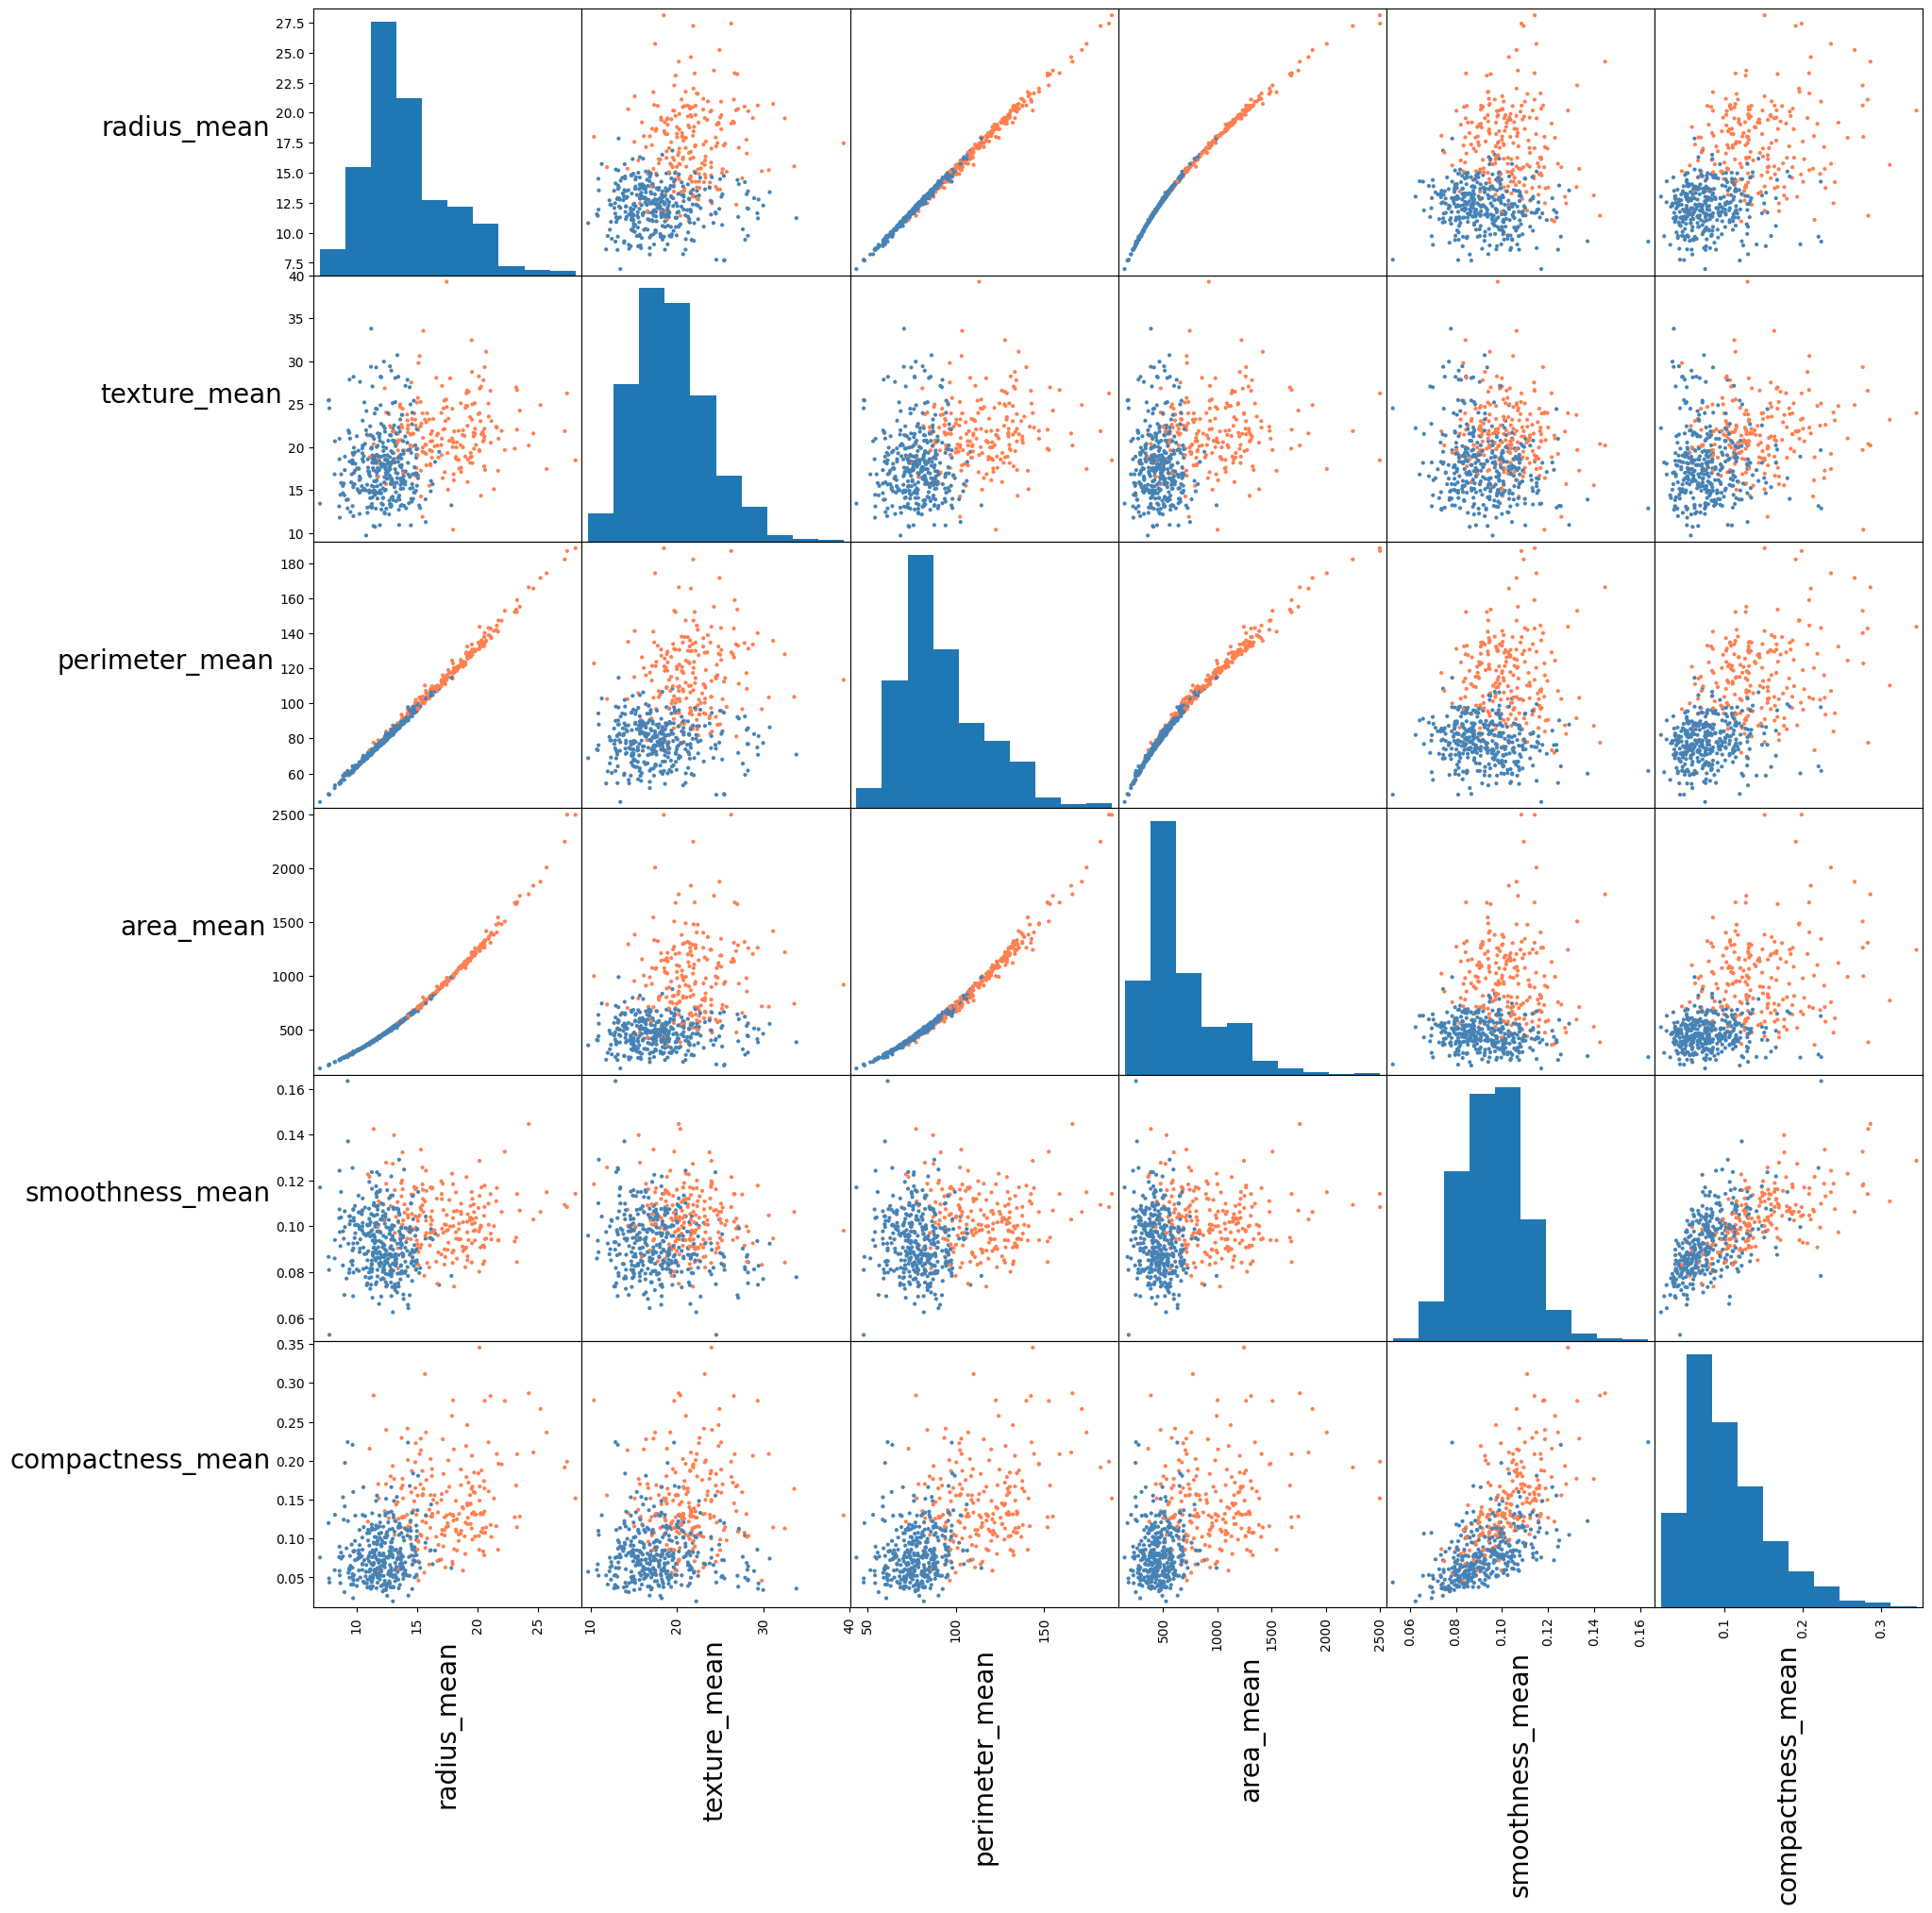

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


import matplotlib.pyplot as plt
# help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
color = cancer.diagnosis.map({'B':'steelblue', 'M':'coral'})
sm=pd.plotting.scatter_matrix(cancer.iloc[:, 0:7], c=color, alpha=1, figsize=(22,22));

# Change labels and tickslabels sizes:
# help: https://matplotlib.org/api/text_api.html#matplotlib.text.Text

#y ticklabels
a=[plt.setp(item.yaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
#x ticklabels
b=[plt.setp(item.xaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
#y labels
c=[plt.setp(item.yaxis.get_label(), 'size', 20) for item in sm.ravel()]
#x labels
d=[plt.setp(item.xaxis.get_label(), 'size', 20) for item in sm.ravel()]

for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xlabel(ax.get_xlabel(), rotation=90)
    plt.ylabel(ax.get_ylabel(), rotation=0, horizontalalignment='right')



---



#### Correlation amongst <font color=green> continous</font> features:

Correlation amongst continous features:


<Axes: >

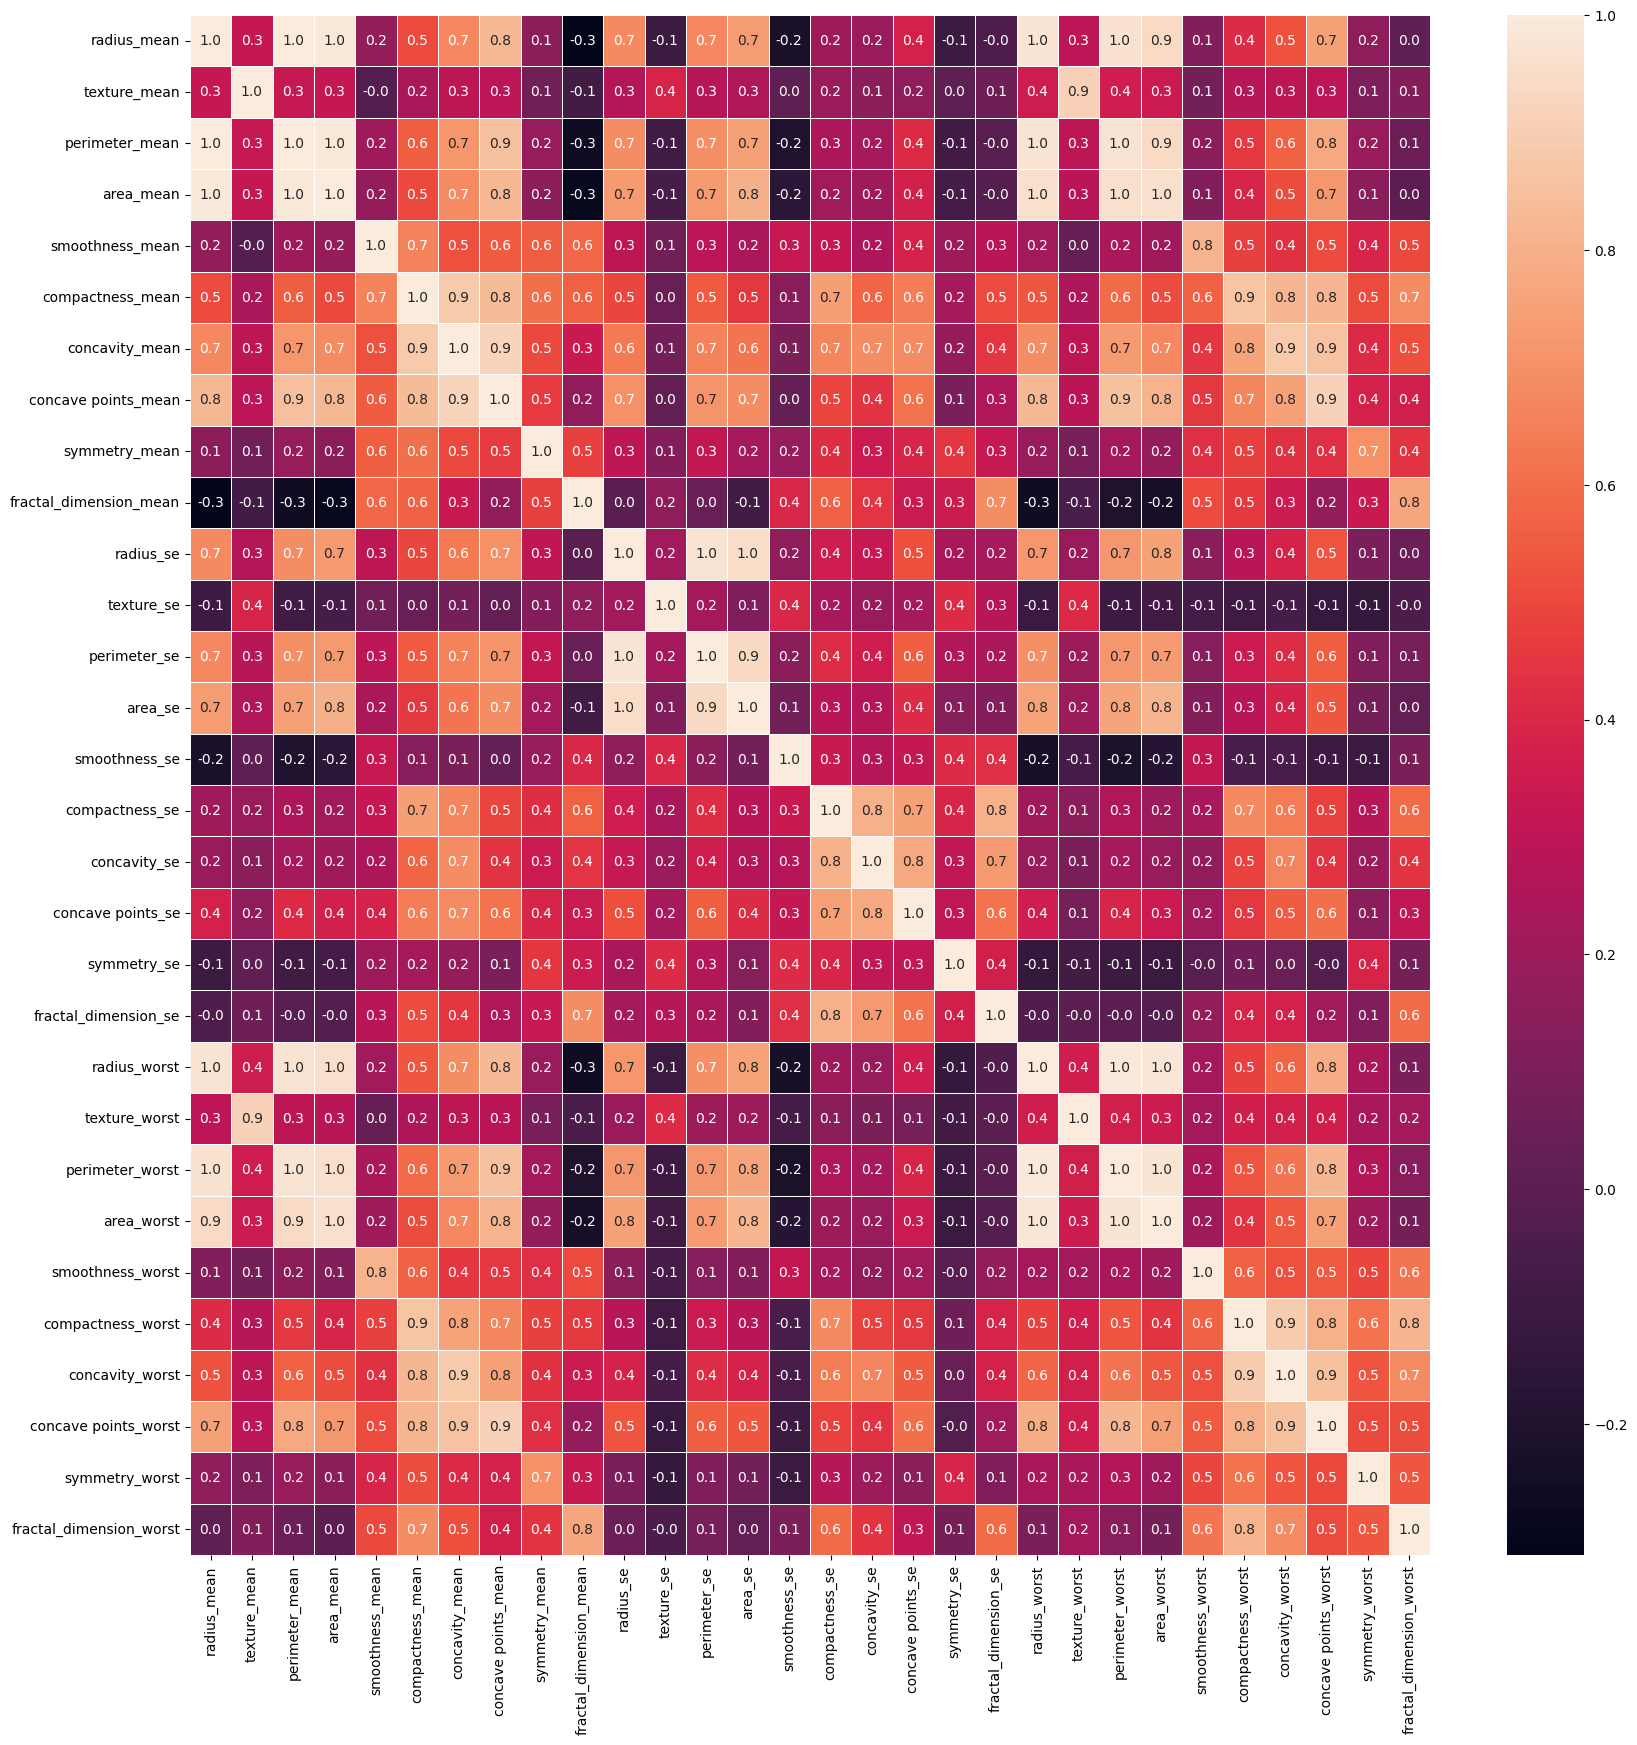

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


import seaborn as sns
input_features = cancer.drop(columns=['diagnosis'])
print ("Correlation amongst continous features:")
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(input_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)



---



#### Visualization of the response variable ('diagnosis')

Number of patients with malignant and benign tumours
Number of Benign:  357
Number of Malignant :  212


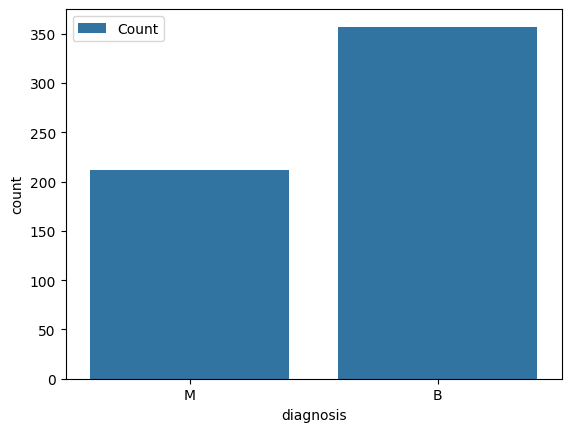

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one

print("Number of patients with malignant and benign tumours")
ax = sns.countplot(x=cancer.diagnosis,label="Count")       # M = 212, B = 357
B, M = cancer.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

As we can see, this dataset is not as imbalanced as the "diabetes" dataset.



---



#### Boxplot of continuous variables regarding 'diagnosis'

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Transforming our data from wide to long format for our plots. Python command: DataFrame.melt([group variable],var_name,value_name)
cancer_plot = cancer.melt(['diagnosis'], var_name='cols',  value_name='vals')
cancer_plot.sort_values('diagnosis', inplace=True)

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


pal = dict(M="coral", B="steelblue")   # Palette of colours

# Box plot of all the continuous/numeric variables regarding 'readmissions'
p = sns.axisgrid.FacetGrid(cancer_plot, col='cols', palette=pal, sharey=False, col_wrap=4)
p = (p.map(sns.boxplot, 'diagnosis','vals', palette=pal, notch=True))
p.fig.set_size_inches(15,30)



---



Do you have any other suggestions? Please post them in Open Learning.



---





---



# 4. Data Preparation: train and test set split


## <font color='blue'> Split the data into training and test sets </font>

Now let's split the data into a training and test set. We will include the optional argument 'stratify = y' to preserve the ratio between diagnosis = B to diagnosis = M.

See below some suggestions:

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


X = cancer.drop(axis=1, columns=['diagnosis'])
y = cancer[['diagnosis']].values

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Sanity check
X.head(5)
#display(X[:][:5])
#display(y[:][:5])

In [ ]:
display(y[:][:20])

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one

# 80% Training, 20% Test


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size = 0.20)



---





---



# 5. Decision Trees
Decision Trees involve segmenting the feature space (the space of our predictor variables) into a number of different regions. The method can be used for both regression (predicting numeric response variable) and classification (classifying a categorical response variable). As the set of rules splitting the feature space into segments, this process can be summarised into a hierarchy of if/else statements in the form of a tree, these types of approaches are known as decision tree methods. Check the documentation to get familiar with [Decision Trees](https://scikit-learn.org/stable/modules/tree.html).

We will use tree methods to predict cancer diagnosis, which is a classification task.



---



## 5.1 Growing a simple decision tree
Beginning with what is known as the *root node*, the node containing the entire dataset, we split the data based on the feature that provides the most information about the response variable. The split is achieved by using a *test*. The form of the test depends on the data type of the chosen feature.
* If the feature of choice is continuous, the test will be of the form $X_i > a$, where $a$ is some constant. In other words, the tests that are used on continuous data are of the form 'is feature $X$ value larger than the value $a$?'.
* If the feature is categorical, the test will be $X_i = c$, where $c$ is one of the levels of the categorical variable. In other words, the tests that are used on categorical data are of the form 'is feature i of the same level as $c$?'. <p>

After assessing the test, the result will be two *children nodes*, one node being for all the data that satisfy the root node test and one node for all data points that do not satisfy the root node test.<p>
    We then continue this process of finding informative rules and splitting the data, resulting in a tree of nodes. The nodes in which we assign a value to the given observations are known as *leaf nodes*.



---



## 5.2 Regularization: Avoiding over-fitting - pruning the tree

We used Ridge and Lasso to avoid over-fitting in the case of linear models. We can't use these techniques here. So, what shall we do?

If we allow the process of testing and splitting to continue indefinitely, we will have a tree with every leaf node being *pure*. *Pure* means that there are only data points of a single class label in the final leaf node. More often than not, such a tree will be very complex and highly over-fitted to the training data. There are two common methods to prevent over-fitting:

1. **Pre-pruning**: Preventing over-fitting prior to the creation of a tree. Common criteria for pre-pruning includes limiting the maximum depth of the tree, limiting the maximum number of leaves, or placing a minimum size constraint on the nodes that must be satisfied for a split to occur. Is this familiar? How shall we determine these values, for example, the maximum depth of the tree? Yes, correct, you already know that these are hyperparameters and as such, they are set up by the user and they can be tuned if we wish to do so.

2. **Post-pruning**: Removing over-fitted leaf nodes after the creation of the tree. This is commonly referred to as "pruning". <p>

Decision trees in scikit-learn are implemented in the **DecisionTreeRegressor** and **DecisionTreeClassifier** classes. **scikit-learn** only implements pre-pruning, not post-pruning.



---



## 5.3 Create a decision tree with no pruning

We will create a decision tree with no pruning. We will see that some of the nodes will have only 1 sample. Calculate accuracy and other scores.


See below some suggestions:

Read [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one



from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


simple_decision_tree = DecisionTreeClassifier(random_state=0)


In [ ]:
simple_decision_tree.fit(X_train, y_train)

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


print("Accuracy on training set: {:.3f}".format(simple_decision_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(simple_decision_tree.score(X_test, y_test)))



---



### 5.3.1 Confusion Matrices and Classification Reports

See below some suggestions:

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_train = simple_decision_tree.predict(X_train)
y_pred_test = simple_decision_tree.predict(X_test)


In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Confusion Matrix for the training set
cm_train = metrics.confusion_matrix(y_true = y_train, y_pred = y_pred_train)

# Visualising the confusion matrix
ax= plt.subplot()
sns.heatmap(cm_train, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for the training set, no reguralization');
ax.xaxis.set_ticklabels(['M', 'B']); ax.yaxis.set_ticklabels(['M', 'B'])

In [ ]:

# Insert your comments and explanations

# Add your code or enhance the existing one


# Confusion Matrix for the test set
cm_test = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_test)

# Visualising the confusion matrix
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for the test set, no reguralization');
ax.xaxis.set_ticklabels(['M', 'B']); ax.yaxis.set_ticklabels(['M', 'B'])



---



In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


from sklearn.metrics import classification_report

print("*********************************************************")
print("Classification Report for the training set, no regularization")
print()
print(classification_report(y_train, y_pred_train))
print("*********************************************************")



In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


print("*********************************************************")
print("Classification Report for the test set, no regularization")
print()
print(classification_report(y_test, y_pred_test))
print("*********************************************************")





---



### 5.3.2 Visualization

See [graphviz documentationn](https://graphviz.readthedocs.io/en/stable/) for install instruction if you are running a Python version < 3.7

In [ ]:
cancer.dtypes

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


from sklearn.tree import export_graphviz
export_graphviz(simple_decision_tree, out_file='tree.dot', class_names=["malignant", "benign"],
                feature_names=X.columns, impurity=False, filled=True)

import graphviz
import os

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



---



## 5.4 Pre-pruning a tree
As mentioned previously, scikit-learn only implements pre-pruning, not post-pruning, so we will only demonstrate how pre-pruning works.<p>
    Now let’s apply pre-pruning to the tree, which will stop growing the tree before we perfectly fit it to the training data.



---



### <font color='blue'> Set the maximum depth equal to 3, meaning only 3 consecutive splits can be made. Fit the model and print the accuracy on the training and test set. </font>

This week, we will set the hyperparameter `max_depth=3` for illustrative purposes. We will tune our hyperparameters next week with GridSearchCV.

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Write Python Code here
decision_tree_max_depth3 = DecisionTreeClassifier(random_state=0, max_depth = 3)
decision_tree_max_depth3.fit(X_train, y_train)

print("*********************************************************")
print("Accuracy on training set: {:.3f}".format(decision_tree_max_depth3.score(X_train, y_train)))
print("*********************************************************")
print("")
print("")

print("*********************************************************")
print("Accuracy on test set: {:.3f}".format(decision_tree_max_depth3.score(X_test, y_test)))
print("*********************************************************")




---



### 5.4.1 Confusion Matrices and Classification Reports

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


y_pred_max_depth3_train = decision_tree_max_depth3.predict(X_train)
y_pred_max_depth3_test = decision_tree_max_depth3.predict(X_test)

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Confusion Matrix for the training set
cm_max_depth3_train = confusion_matrix(y_true = y_train, y_pred = y_pred_max_depth3_train)

# Visualising the confusion matrix
ax= plt.subplot()
sns.heatmap(cm_max_depth3_train, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for the training set for single decision tree with max depth = 3');
ax.xaxis.set_ticklabels(['M', 'B']); ax.yaxis.set_ticklabels(['M', 'B'])



---



In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Confusion Matrix for the test set
cm_max_depth3_test = confusion_matrix(y_true = y_test, y_pred = y_pred_max_depth3_test)

# Visualising the confusion matrix
ax= plt.subplot()
sns.heatmap(cm_max_depth3_test, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for the test set for single decision tree with max depth = 3');
ax.xaxis.set_ticklabels(['M', 'B']); ax.yaxis.set_ticklabels(['M', 'B'])



---



In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


print("*********************************************************")
print("Classification Report for the training set for max depth = 3")
print("")
print(classification_report(y_train, y_pred_max_depth3_train))
print("*********************************************************")



---



In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


print("*********************************************************")
print("Classification Report for the test set for max depth = 3")
print()
print(classification_report(y_test, y_pred_max_depth3_test))
print("*********************************************************")




---



### 5.4.2 Visualisation

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


from sklearn.tree import export_graphviz
export_graphviz(decision_tree_max_depth3, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=X.columns, impurity=False, filled=True)


import graphviz
import os
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

The visualization of the tree allows for an intuitive interpretation on how the algorithm classifies its data.<p>



---



### <font color='blue'> Did we improve our accuracy / precision-recall? Why? </font>

<b> Write your answer here:</b>
#####################################################################################################################

We did improve our accuracy, precision and recall.
Why? Because by restricting the depth of the 3, we avoid overfitting. That is, the model doesn't overfit to the training set. It generalizes better.


#####################################################################################################################



---



### 5.4.3 Feature importance
There are some useful properties that we can derive to summarise the workings of the tree. A common example is *feature importance*, which as its name suggests, numerically rates the importance each feature plays in the decision making process of the tree. It is a number between 0 and 1, with the sum of all feature importances equalling to 1.

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Creating DataFrame with the features names and features importance
F_importance = pd.concat([pd.DataFrame(X.columns,columns=['Features']),
                  pd.DataFrame(np.transpose(decision_tree_max_depth3.feature_importances_),columns=['Feature Importance'])],
                 axis = 1)

# Sorting new DataFrame by feature importance (Sort Descending)
F_importance = F_importance.sort_values(by='Feature Importance', ascending=False)
F_importance



---



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (7,8)
    # Sort feature importances in ascending order
    indices = np.argsort(model.feature_importances_)

    # Rearrange feature names so they match the sorted feature importances
    columns_name = [X.columns[i] for i in indices]

    # Create plot
    plt.figure()
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.barh(range(X.shape[1]), model.feature_importances_[indices])
    plt.yticks(range(X.shape[1]), columns_name)
    plt.show()

In [ ]:
plot_feature_importances(decision_tree_max_depth3)



---



This is not an effective visualization, as we have so many features. The solution is to remove all features that are of very low importance. We will only select the most important features, which are the first six.

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (6,4)
    #locate indices of the features with feature importance greater than 0.01. Sort descending
    indices = np.argsort(decision_tree_max_depth3.feature_importances_)
    indices = indices[-6:]

    # Rearrange feature names so they match the sorted feature importances
    columns_name = [X.columns[i] for i in indices]

    #extract the number of features that have non-zero feature importance
    n_features = X.iloc[:,indices].shape[1]

    # Create plot
    plt.figure()
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.barh(range(n_features), model.feature_importances_[indices])
    plt.yticks(range(n_features), columns_name)
    plt.show()

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


plot_feature_importances(decision_tree_max_depth3)

From the Introduction to machine learning with Python : a guide for data scientists by Andreas C. Müller and Sarah Guido: **"... if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information."**



---



## 5.5 Advantages/disadvantages of decision trees
**Advantages**:
* Easy interpretation and visualisation of decision rules. Particularly to non-experts.
* Very fast to train, and then predict.
* Invariant to scaling of the data. This removes the need for preprocessing such as the standardisation which was needed for the regularised logistic models.
* Are able to predict non-linear data.
* Can be used to determine feature importance.
* Further, provides automatic feature selection by only choosing the important features by which the data are split. This further reduces the need for preprocessing.
* Provides probability estimates. <p>

**Disadvantages**:
* Tendency to over-fit, even after pruning methods.
* Often outperformed by other models, including the ensemble methods utilising the basic decision tree, which we will discuss now.



---

